##<i> Course Project for Artificial Intelligence cs 4300-001 <br>
#Author/creator: Zachary J. Fulliam<br>
##Date: Spring 2022 semester 03/09/2022<br>
#Goal: Determine Water Potability using features and criteria.
Binary Classification Problem. </i>

**TASK 1** <br>
#UPLOAD DATASET TO NOTEBOOK

In [ ]:
#import csv dataset
from google.colab import files
uploaded = files.upload()

Saving water_potability.csv to water_potability.csv


In [ ]:
#invite friends to the party
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from functools import *
from itertools import combinations
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error

In [ ]:
pip install pycaret

In [ ]:
dataset = pd.read_csv('water_potability.csv',delimiter=',')

#**TASK 2 DESCRIBE YOUR DATA**<br>
to check features of dataset

In [ ]:
print(dataset.shape)

(3276, 10)


In [ ]:
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
#checking data type of features
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


#**Observation:**<br>
##All are numerical features<br>
More than enough rows and features<br>
Data appears to have uploaded correctly from head.

# **Describe Data & Discuss Values**<br>
 **TASK 3** DESCRIBE DATASET USING data.describe()<br>
 discuss values for min, max, mean, median, etc.

In [ ]:
#describing dataset
dataset.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<i> Display **attributes and information** </i>

In [ ]:
#displaying attributes and information
dataset.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


#**TASK 4 VISUALIZE DATA:** PLOT HISTOGRAMS SHOWING DISTRIBUTION OF EACH INPUT.

**Plotting before normalization**

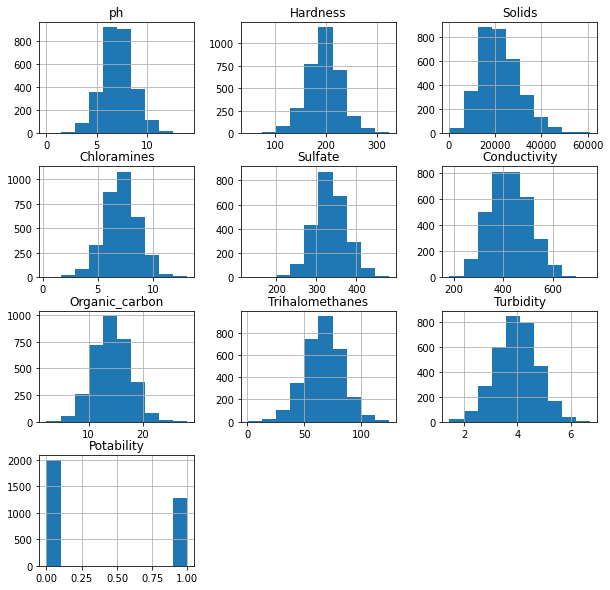

In [ ]:
plt.rcParams["figure.figsize"]=((10,10))
dataset.hist()
plt.show()

#<i> Next  **check for missing values** </i>

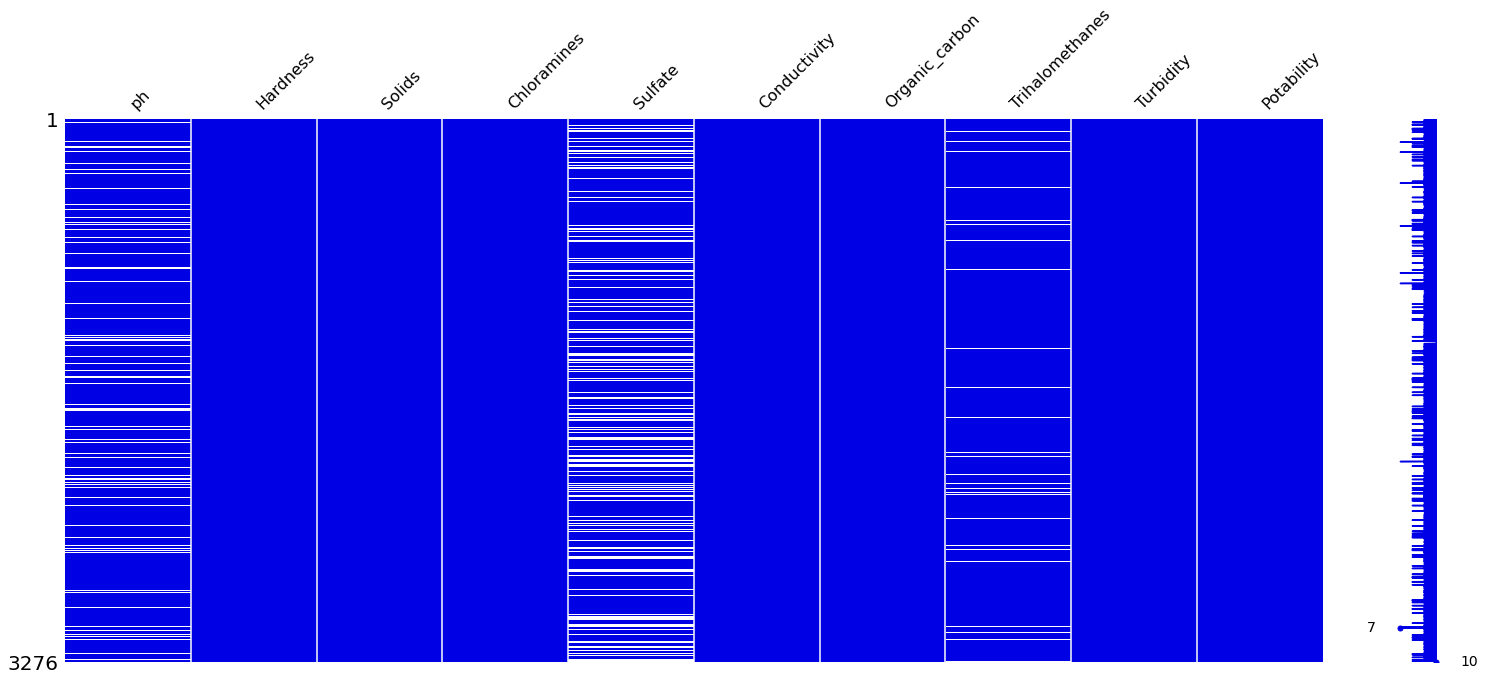

In [ ]:
#checking for missing values
import missingno as msno
msno.matrix(dataset,color=(0.0, 0.0, 0.9))

<i> **Remove rows with missing values** </i>

In [ ]:
#remove rows with missing values
dataset.dropna(axis=0,inplace=True)

#<i> **Observation**: There are 110 anomalies in the data, observing the top ten anomaly dates we can see there is much data predicted to have potability. </i>

#**Display Anomaly Potability**<i> The color red is used for nonpotable and green for potable to imitate universal green for go(safe to drink) and red for stop(unsafe to drink). </i>

#<i>**Observation** observing the data judged as an anomaly, there are more cases predicted as potable.
We can predict from this that there are many cases in this dataset where undrinkable water is judged to be potable. That is, we can predict that recall may be low

##**TASK 5**<br>
#**Check the distribution of the output label and visulize/plot.**
done before normalization, visualizing after further in the report.

<i>**Checking Target Imbalance**</i>

In [ ]:
colors = ['red', 'green']
labels = ['No','Yes']
values = dataset['Potability'].value_counts()/dataset['Potability'].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Potability",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="blue",
    plot_bgcolor='yellow',
    font_color="white",
)
fig.show()

<i>**Observation**: Target is now balanced! </i>

#**TASK FOR PHASE 3: SHUFFLE DATA & SPLIT INTO VALIDATION & TRAINING SETS** 

In [ ]:
# Shuffle the dataset
# NOTE: shuffle dataframe in-place and reset the index
dataset = dataset.sample(frac=1).reset_index(drop=True)

# Convert Pandas Dataframe to Numpy dArray
dataset_np = dataset.values
X = dataset.drop('Potability', axis='columns').values
Y = dataset['Potability'].values

In [ ]:
# Index for 20%
index_20percent = int(0.2 * len(dataset_np[:, 0]))  
print(index_20percent)

# Split into validation (20%) and training (80%)
XVALID = X[:index_20percent, :]
YVALID = Y[:index_20percent]

XTRAIN = X[index_20percent:, :]
YTRAIN = Y[index_20percent:]

402


#**NORMALIZE DATA**<br>
##Data normalization: Important note: Do standardization/normalization after spliting into train and test/validation. Reason: avoid any data leakage. <br>


*   Standardization: typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance).
*   Normalization: typically means rescales the values into a range of [0, 1]


*   Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve).
*   Standardization assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian.






In [ ]:
## Mean normalization
min = XTRAIN.min(axis = 0) 
max = XTRAIN.max(axis = 0) 
mean = XTRAIN.mean(axis = 0)
XTRAIN = (XTRAIN - mean) / (max - min)
XVALID = (XVALID - mean) / (max - min)

In [ ]:
## Rescaling
Ymax = YTRAIN.max()
YTRAIN = YTRAIN / Ymax
YVALID = YVALID / Ymax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb895443e50>,
      dtype=object)

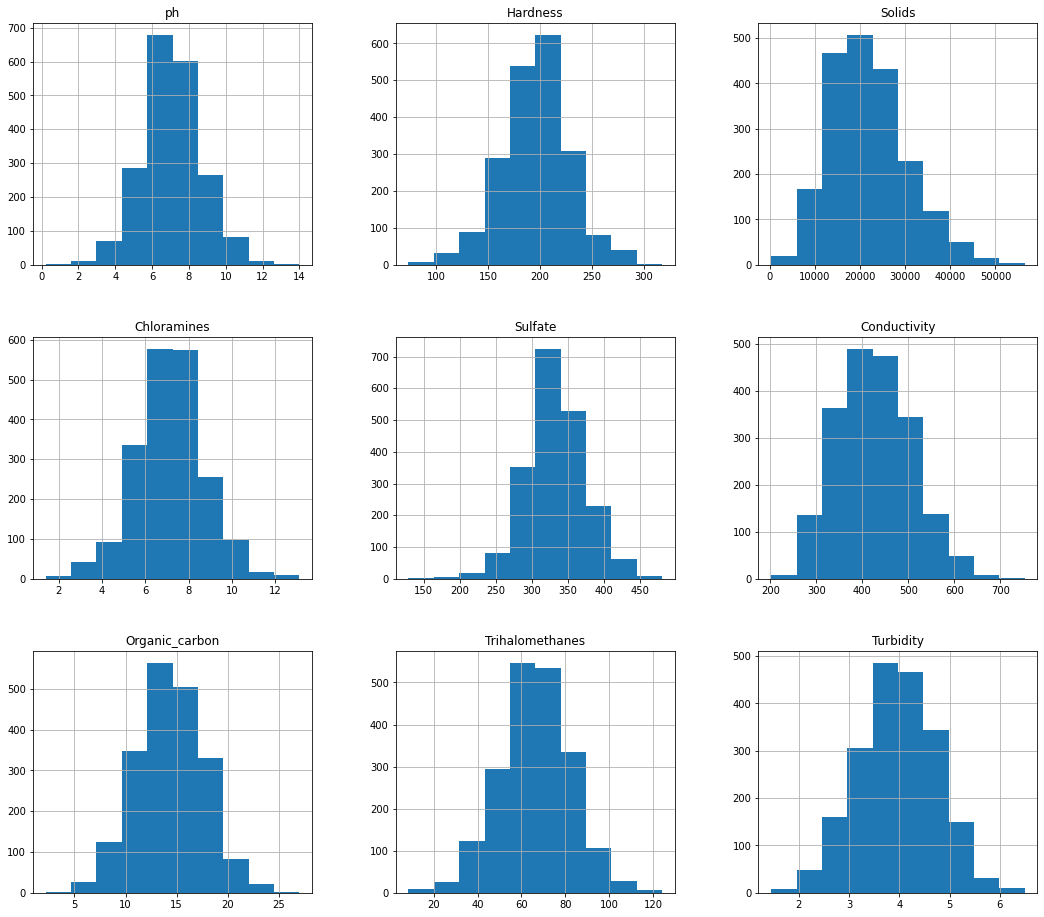

In [ ]:
## Verifying
## Before Normalize
dataset.drop('Potability', axis='columns').hist(figsize=(18,16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb894e7bcd0>,
      dtype=object)

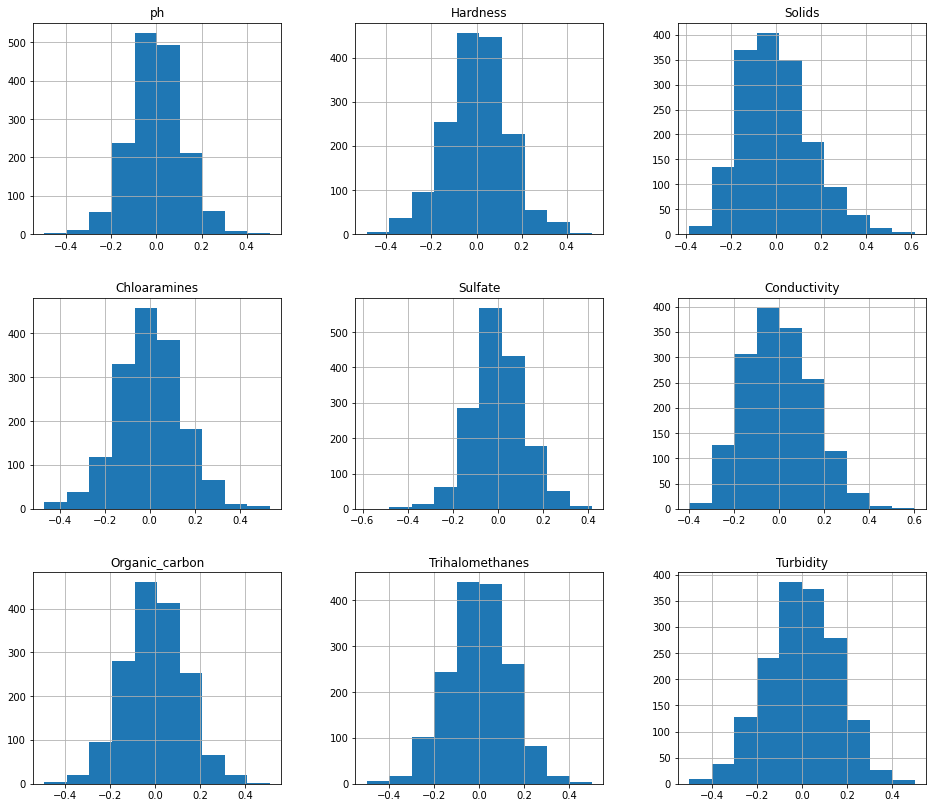

In [ ]:
## Verifying
## After Normalize
dfx = pd.DataFrame(data=XTRAIN)
dfx.columns = ['ph', 'Hardness', 'Solids', 'Chloaramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes','Turbidity']
dfx.hist(figsize=(16,14))

In [ ]:
np.isnan(dataset)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2006,False,False,False,False,False,False,False,False,False,False
2007,False,False,False,False,False,False,False,False,False,False
2008,False,False,False,False,False,False,False,False,False,False
2009,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(X.shape,Y.shape)

(2011, 9) (2011,)


#**Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
## Baseline Model #1
model1 = Sequential()
model1.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
## Baseline Model #2
model2 = Sequential()
model2.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
## Baseline Model #3
model3 = Sequential()
model3.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [ ]:
## Model using linear activation (only last neuron)
modelA = Sequential()
modelA.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
modelA.add(Dense(4, activation='relu'))
modelA.add(Dense(1, activation='linear'))

In [ ]:
## Model using linear activation (all neurons)
modelB = Sequential()
modelB.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='linear'))
modelB.add(Dense(4, activation='linear'))
modelB.add(Dense(1, activation='linear'))

In [ ]:
## Model using sigmoid activation (only last neuron)
modelC = Sequential()
modelC.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='relu'))
modelC.add(Dense(4, activation='relu'))
modelC.add(Dense(1, activation='sigmoid'))

In [ ]:
## Model using sigmoid activation (all neurons)
modelD = Sequential()
modelD.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
modelD.add(Dense(4, activation='sigmoid'))
modelD.add(Dense(1, activation='sigmoid'))

In [ ]:
## Model using sigmoid with leaky relu activation
## The dying ReLU problem happens if the input becomes too large causing the gradient to update the weights such that the summation, and thus the input, will always be less than zero for the rest of the training session.
## Source: https://www.quora.com/What-is-the-dying-ReLU-problem-in-neural-networks
modelE = Sequential()
modelE.add(Dense(8, input_dim = len(XTRAIN[0, :]), activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelE.add(Dense(4, activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelE.add(Dense(1, activation='sigmoid'))

In [ ]:
## Overfitting Model
modelF = Sequential()
modelF.add(Dense(80, input_dim = len(XTRAIN[0, :]), activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelF.add(Dense(40, activation=partial(tf.nn.leaky_relu, alpha=0.1)))
modelF.add(Dense(1, activation='sigmoid'))

#**NN model compilation.** <br>
Binary Classification Loss Functions


*  Binary Cross Entropy Loss
*   Hinge Loss <br>

Using Adaptive Moment Estimation (Adam) because it automatically tunes itself and gives good results in a wide range of problems.


In [ ]:
## Compile our model
model1.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model2.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model3.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

modelA.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
modelB.compile(loss='mse', optimizer = 'adam', metrics=['mae'])
modelC.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
modelD.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
modelE.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
modelF.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#**Fitting our model**<br>

**Batch Size:** defines the number of samples that will be propagated through the network. I.e. let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network.<br>

**In general:** Larger batch sizes result in faster progress in training, but don't always converge as fast. Smaller batch sizes train slower, but can converge faster. It's definitely problem dependent.

In [ ]:
## Baseline Model
callback_a1 = ModelCheckpoint(filepath = "model1.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b1 = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
history1 = model1.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_a1, callback_b1], verbose = 0)

In [ ]:
callback_a2 = ModelCheckpoint(filepath = "model2.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b2 = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
history2 = model2.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_a2, callback_b2], verbose = 0)

In [ ]:
callback_a3 = ModelCheckpoint(filepath = "model3.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_b3 = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
history3 = model3.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_a3, callback_b3], verbose = 0)

In [ ]:
## Model using linear activation (only last neuron)
callback_aA = ModelCheckpoint(filepath = "modelA.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bA = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyA = modelA.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aA, callback_bA], verbose = 0)

In [ ]:
## Model using linear activation (all neurons)
callback_aB = ModelCheckpoint(filepath = "modelB.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bB = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyB = modelB.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aB, callback_bB], verbose = 0)

In [ ]:
## Model using sigmoid activation (only last neuron)
callback_aC = ModelCheckpoint(filepath = "modelC.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bC = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyC = modelC.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aC, callback_bC], verbose = 0)

In [ ]:
## Model using sigmoid activation (all neurons)
callback_aD = ModelCheckpoint(filepath = "modelD.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bD = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyD = modelD.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aD, callback_bD], verbose = 0)

In [ ]:
## Model using sigmoid with leaky relu activation
callback_aE = ModelCheckpoint(filepath = "modelE.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bE = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyE = modelE.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aE, callback_bE], verbose = 0)

In [ ]:
## Overfitting Model
callback_aF = ModelCheckpoint(filepath = "modelF.hdf5", monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 0)
callback_bF = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)
historyF = modelF.fit(XTRAIN, YTRAIN, validation_data=(XVALID, YVALID), epochs = 512, batch_size=128, callbacks = [callback_aF, callback_bF], verbose = 0)

#**NN Model Evaluation**<br>
##**Confusion Matrix** is a simple way to  layout how many predicted categories or classes were correctly predicted and how many were not. <br>
**Goal** we want as many predictions as possible where more trues than falses.<br>

*   Evaluate the loss value and metrics values for the model in test mode using evaluate function.
*   Predict the output for our valid dataset. If the prediction is greater than 0.5 then the output is 1 else the output is 0.


*   Check the accuracy on the valid dataset with confusion matrix.





**Source** https://machinelearningmastery.com/confusion-matrix-machine-learning/

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def model_evaluation_classification(xvalid, yvalid, model):
    scores = model.evaluate(xvalid, yvalid)
    print("%s: %.2f" % (model.metrics_names[0], scores[0]))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

    prediction = model.predict(xvalid)
    prediction = (prediction > 0.5)
    cm = confusion_matrix(yvalid, prediction)
    acc = (cm[0, 0] + cm[1, 1]) / sum(cm.flatten()) * 100
    print("\n%s" % cm)
    print("%s%%\n" % acc)

    accuracy = accuracy_score(yvalid, prediction.round()) * 100.0
    precision = precision_score(yvalid, prediction.round()) * 100.0
    recall = recall_score(yvalid, prediction.round()) * 100.0
    f1score = f1_score(yvalid, prediction.round())

    print("Accuracy: %.2f%%" % (accuracy))
    print("Precision: %.2f%%" % (precision))
    print("Recall: %.2f%%" % (recall))
    print("F1-score: %.2f\n" % (f1score))

    for i in range(10):
	    print("X=%s, Predicted=%s" % (xvalid[i], prediction[i]))
    return prediction

def model_evaluation_regression(xvalid, yvalid, model):
    scores = model.evaluate(xvalid, yvalid)
    for i in range(len(scores)):
        print("%s: %.2f" % (model.metrics_names[i], scores[i]))

    prediction = model.predict(xvalid)
    mae = mean_absolute_error(yvalid, prediction)
    prediction = (prediction > 0.5)
    print("MAE: %.2f\n" % (mae))

    for i in range(10):
	    print("X=%s, Predicted=%s" % (xvalid[i], prediction[i]))
    return prediction

In [ ]:
## Baseline Model
ypred1 = model_evaluation_classification(XVALID, YVALID, model1)

13/13 [==============================] - 0s 1ms/step - loss: 0.6043 - accuracy: 0.6965
loss: 0.60
accuracy: 69.65%

[[216  33]
 [ 89  64]]
69.65174129353234%

Accuracy: 69.65%
Precision: 65.98%
Recall: 41.83%
F1-score: 0.51

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pr

In [ ]:
ypred2 = model_evaluation_classification(XVALID, YVALID, model2)

13/13 [==============================] - 0s 2ms/step - loss: 0.6119 - accuracy: 0.6915
loss: 0.61
accuracy: 69.15%

[[209  40]
 [ 84  69]]
69.15422885572139%

Accuracy: 69.15%
Precision: 63.30%
Recall: 45.10%
F1-score: 0.53

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pr

In [ ]:
ypred3 = model_evaluation_classification(XVALID, YVALID, model3)

13/13 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6692
loss: 0.61
accuracy: 66.92%

[[206  43]
 [ 90  63]]
66.91542288557214%

Accuracy: 66.92%
Precision: 59.43%
Recall: 41.18%
F1-score: 0.49

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pr

In [ ]:
## Model using linear activation (only last neuron)
ypredA = model_evaluation_regression(XVALID, YVALID, modelA)

13/13 [==============================] - 0s 2ms/step - loss: 0.2118 - mae: 0.4080
loss: 0.21
mae: 0.41
MAE: 0.41

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Predicted=[ True]
X=[ 0.05502749 -0.00790636 -0.1477517   0.16713978  0.03221775  0.1539673
 -0.02636597  0.28544

In [ ]:
## Model using linear activation (all neurons)
ypredB = model_evaluation_regression(XVALID, YVALID, modelB)

13/13 [==============================] - 0s 2ms/step - loss: 0.2392 - mae: 0.4789
loss: 0.24
mae: 0.48
MAE: 0.48

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[False]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Predicted=[False]
X=[ 0.05502749 -0.00790636 -0.1477517   0.16713978  0.03221775  0.1539673
 -0.02636597  0.28544

In [ ]:
## Model using sigmoid activation (only last neuron)
ypredC = model_evaluation_classification(XVALID, YVALID, modelC)

13/13 [==============================] - 0s 2ms/step - loss: 0.6155 - accuracy: 0.6692
loss: 0.62
accuracy: 66.92%

[[204  45]
 [ 88  65]]
66.91542288557214%

Accuracy: 66.92%
Precision: 59.09%
Recall: 42.48%
F1-score: 0.49

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pr

In [ ]:
## Model using sigmoid activation (all neurons)
ypredD = model_evaluation_classification(XVALID, YVALID, modelD)

13/13 [==============================] - 0s 3ms/step - loss: 0.6666 - accuracy: 0.6194
loss: 0.67
accuracy: 61.94%

[[249   0]
 [153   0]]
61.940298507462686%

Accuracy: 61.94%
Precision: 0.00%
Recall: 0.00%
F1-score: 0.00

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[False]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pre

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
## Model using sigmoid with leaky relu activation
ypredE = model_evaluation_classification(XVALID, YVALID, modelE)

13/13 [==============================] - 0s 2ms/step - loss: 0.6122 - accuracy: 0.6766
loss: 0.61
accuracy: 67.66%

[[206  43]
 [ 87  66]]
67.66169154228857%

Accuracy: 67.66%
Precision: 60.55%
Recall: 43.14%
F1-score: 0.50

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pr

In [ ]:
## Overfitting Model
ypredF = model_evaluation_classification(XVALID, YVALID, modelF)

13/13 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6816
loss: 0.61
accuracy: 68.16%

[[208  41]
 [ 87  66]]
68.1592039800995%

Accuracy: 68.16%
Precision: 61.68%
Recall: 43.14%
F1-score: 0.51

X=[-0.03488912  0.14703084  0.07748349  0.21806089  0.24742415  0.03254796
  0.06701357 -0.0421402  -0.10565237], Predicted=[ True]
X=[-0.18107129 -0.04133789  0.10526246 -0.03322895  0.06441616 -0.08090124
 -0.01576763  0.07233001  0.18592692], Predicted=[False]
X=[-0.05273893 -0.08476228  0.0670334   0.09902178  0.0043185  -0.2232418
 -0.18380837  0.03360964 -0.05913328], Predicted=[False]
X=[ 0.04743012  0.09237086  0.013459    0.13941694  0.09097092  0.17338041
  0.04932418  0.06493249 -0.04736181], Predicted=[False]
X=[ 0.03686013  0.04676125 -0.15280297 -0.08400385 -0.01222872  0.04909607
  0.02479448  0.18880118 -0.11431928], Predicted=[False]
X=[-0.14465399  0.31862549  0.07546256  0.27534646  0.13771739  0.16044152
  0.19462738 -0.04161373  0.07377616], Pre

#**Learning Curves**

In [ ]:
def learning_curves_logistic(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc="best")

    ax2.plot(model_history.history['accuracy'])
    ax2.plot(model_history.history['val_accuracy'])
    ax2.set_ylabel('accuracy')
    ax2.set_xlabel('epoch')
    ax2.legend(['training accuracy data', 'validation accuracy data'], loc='best')

    fig.show()

In [ ]:
def learning_curves_linear(model_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    ax1.plot(model_history.history['loss'])
    ax1.plot(model_history.history['val_loss'])
    ax1.set_ylabel('loss')
    ax1.set_xlabel('epoch')
    ax1.legend(['training loss data', 'validation loss data'], loc='best')

    ax2.plot(model_history.history['mae'])
    ax2.plot(model_history.history['val_mean_absolute_error'])
    ax2.set_ylabel('error')
    ax2.set_xlabel('epoch')
    ax2.legend(['training error data', 'validation error data'], loc='best')

    fig.show()

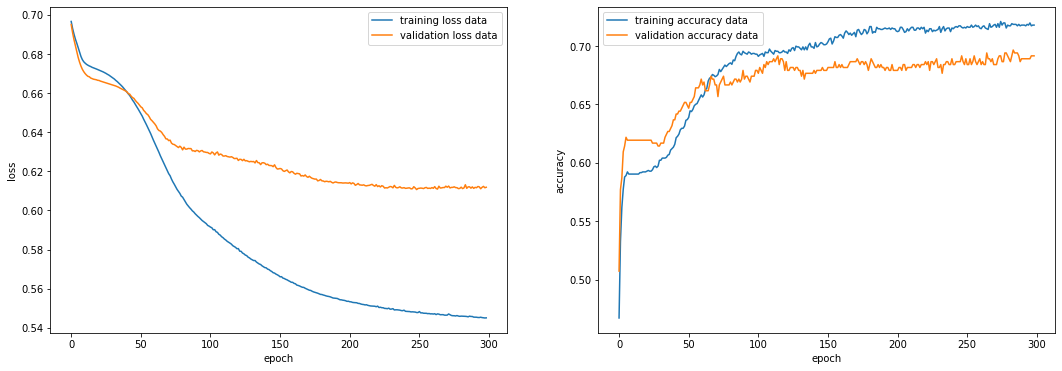

In [ ]:
## Baseline Model
learning_curves_logistic(history2)

KeyError: ignored

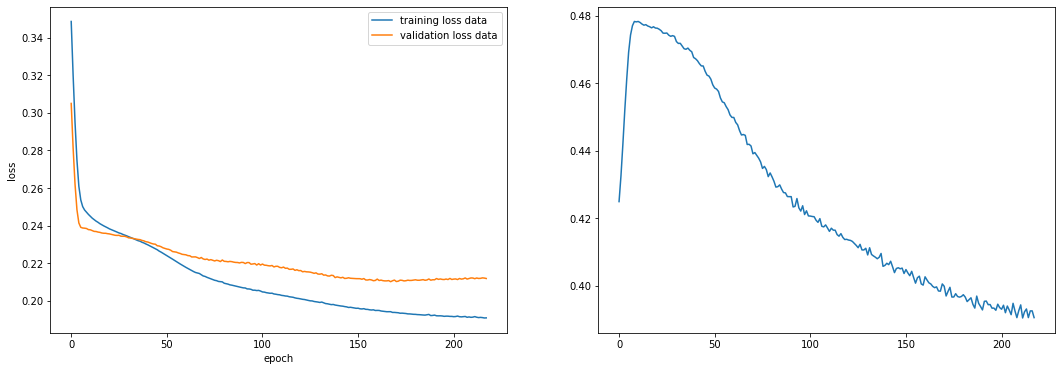

In [ ]:
## Model using linear activation (only last neuron)
learning_curves_linear(historyA)

KeyError: ignored

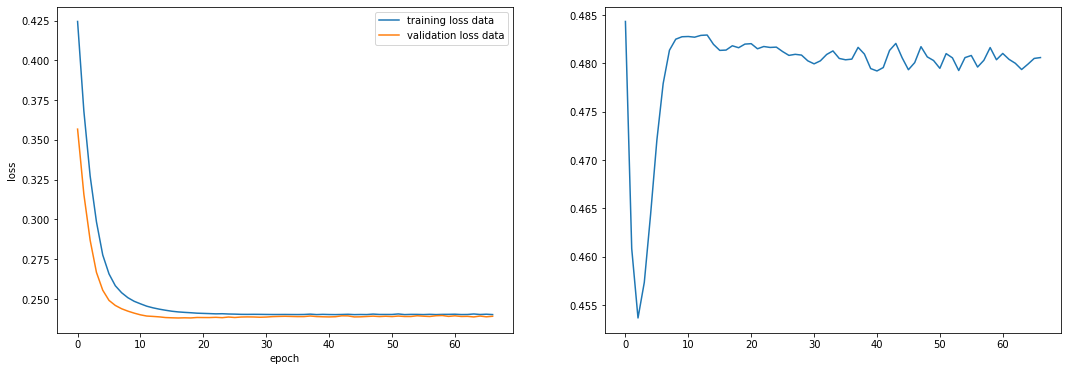

In [ ]:
## Model using linear activation (all neurons)
learning_curves_linear(historyB)

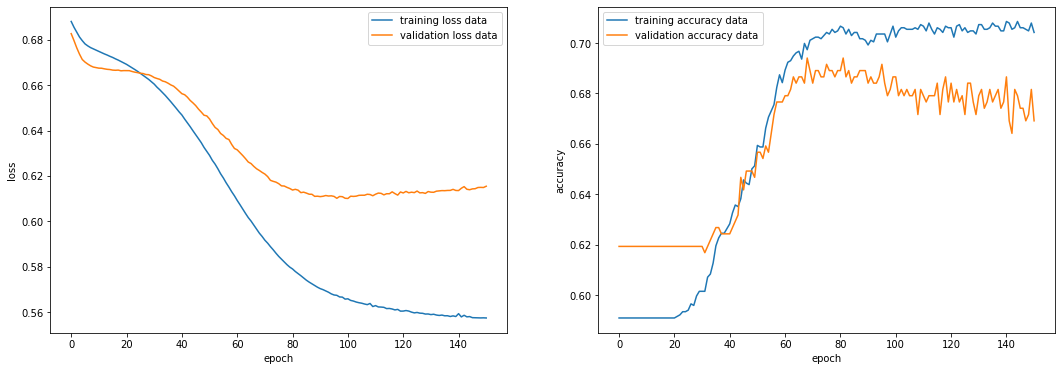

In [ ]:
## Model using sigmoid activation (only last neuron)
learning_curves_logistic(historyC)

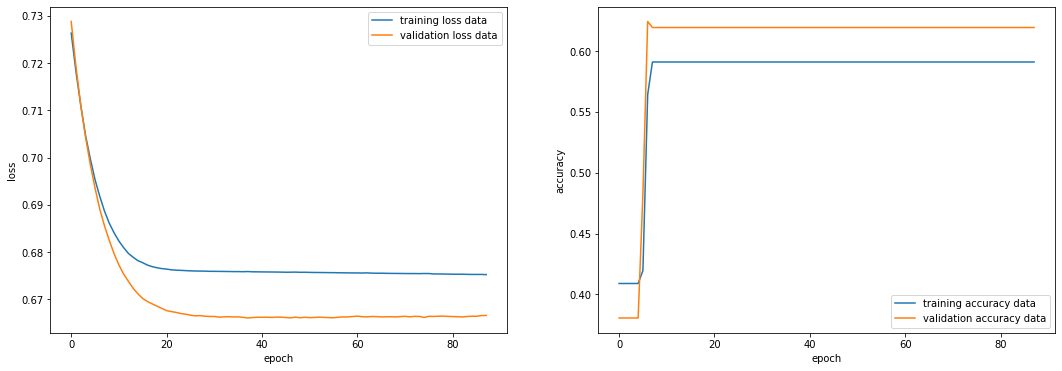

In [ ]:
## Model using sigmoid activation (all neurons)
learning_curves_logistic(historyD)

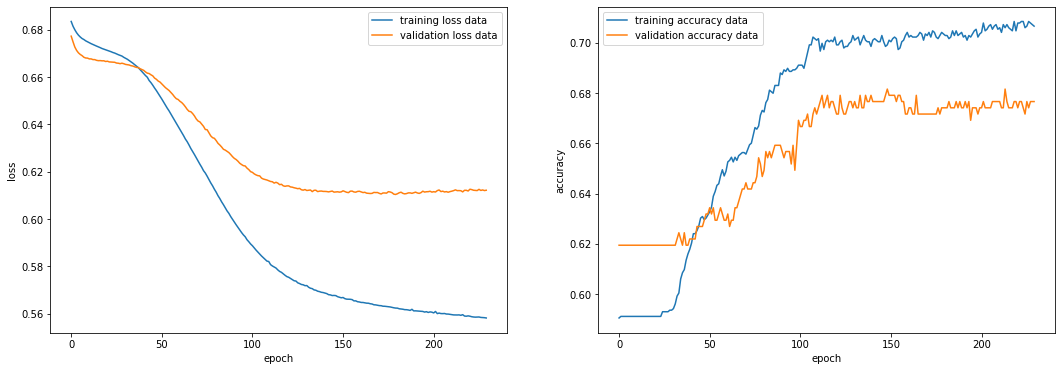

In [ ]:
## Model using sigmoid with leaky relu activation
learning_curves_logistic(historyE)

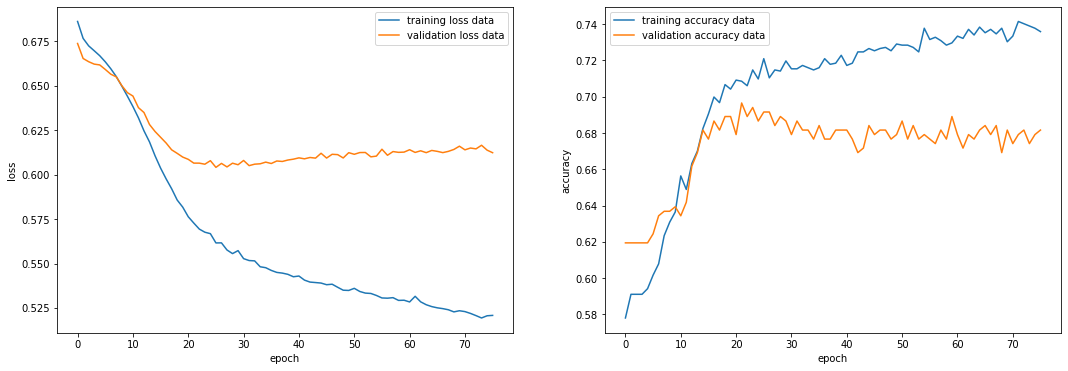

In [ ]:
## Overfitting Model
learning_curves_logistic(historyF)

#**MODEL PERFORMANCE MEASURING USING ROC CURVES**<br>
##**what are ROC curves**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

1.  True Positive Rate
2.  False Positive Rate <br>
**Testing Accuracy** The closer the graph is to the top and left-hand borders, the more accurate the test. Likewise, the closer the graph to the diagonal, the less accurate the test. A perfect test would go straight from zero up the the top-left corner and then straight across the horizontal.



In [ ]:
def model_performances(yvalid, ypred, title="ROC Curve"):
    fpr, tpr, thresholds = roc_curve(YVALID, ypred)
    plt.plot([0, 1], [0, 1], linestyle = "dashed" ,color="b")
    plt.plot(fpr, tpr ,color="red", label=('Area under the curve: ', round(auc(fpr, tpr), 4)))
    plt.title(title, fontsize=10)
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.legend(loc='best', fontsize=10)

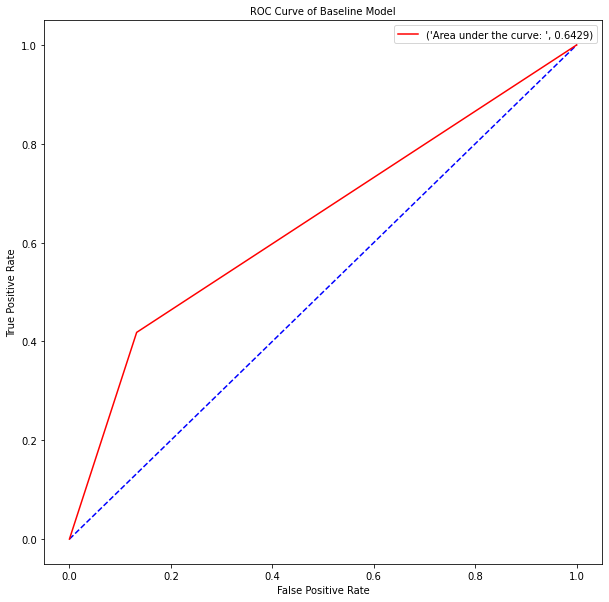

In [ ]:
## Baseline Model
model_performances(YVALID, ypred1, 'ROC Curve of Baseline Model')

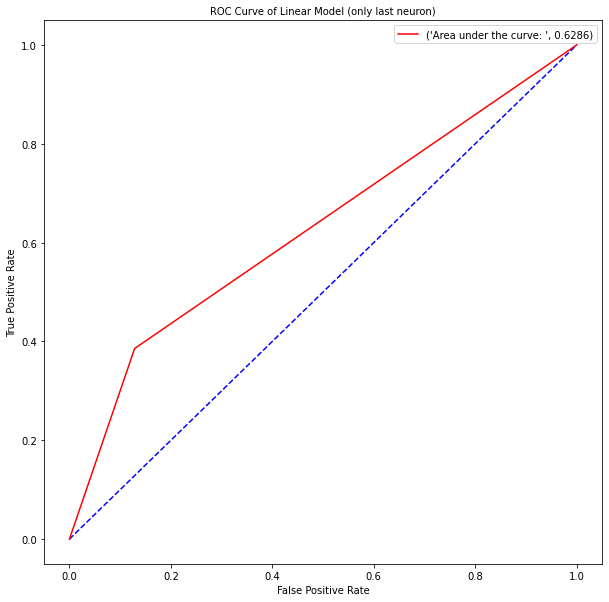

In [ ]:
## Model using linear activation (only last neuron)
model_performances(YVALID, ypredA, 'ROC Curve of Linear Model (only last neuron)')

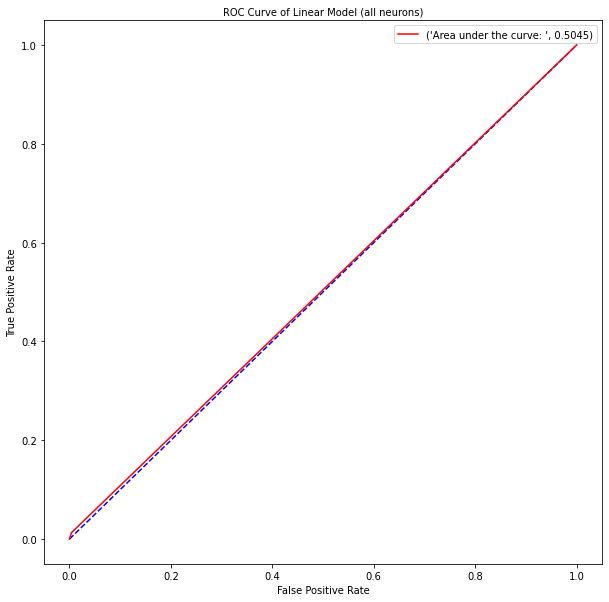

In [ ]:
## Model using linear activation (all neurons)
model_performances(YVALID, ypredB, 'ROC Curve of Linear Model (all neurons)')

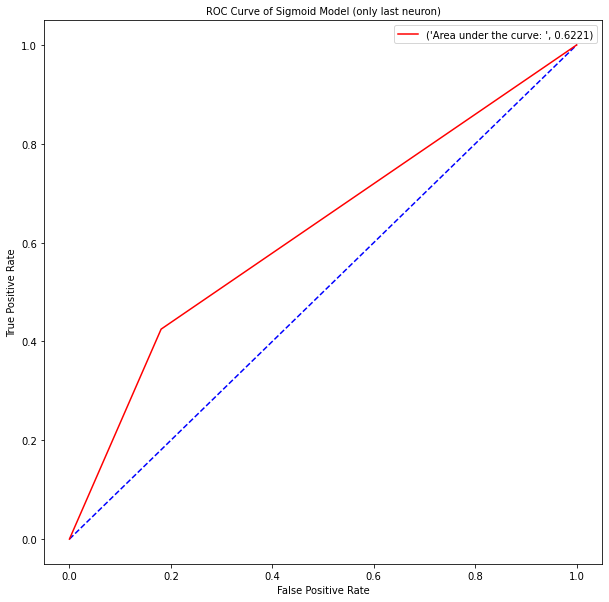

In [ ]:
## Model using sigmoid activation (only last neuron)
model_performances(YVALID, ypredC, 'ROC Curve of Sigmoid Model (only last neuron)')

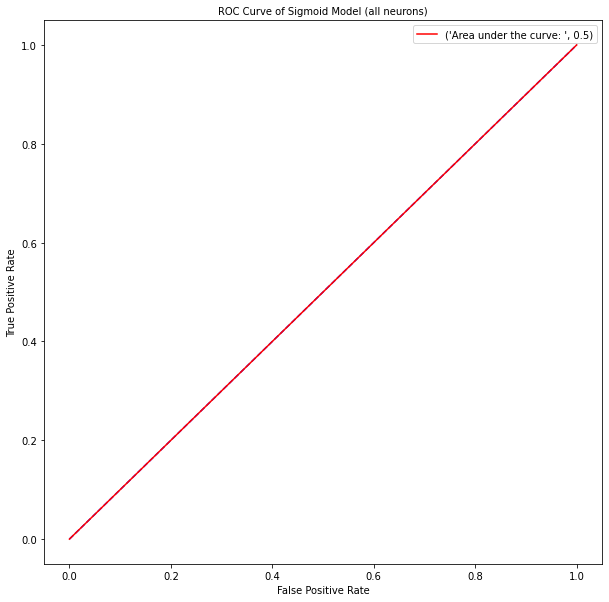

In [ ]:
## Model using sigmoid activation (all neurons)
model_performances(YVALID, ypredD, 'ROC Curve of Sigmoid Model (all neurons)')


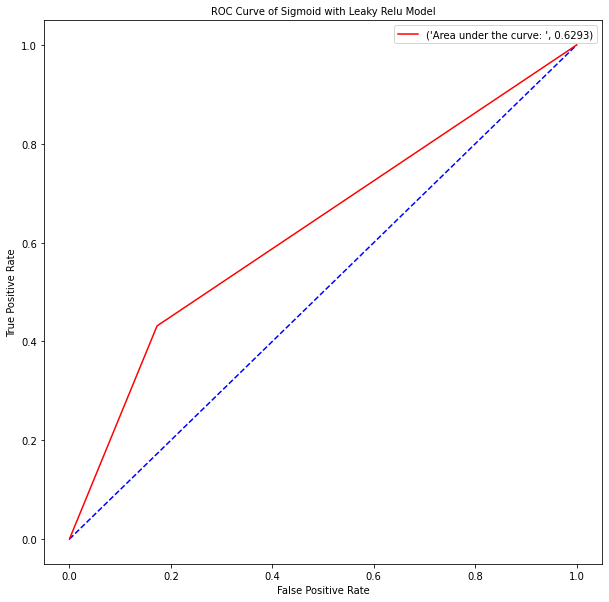

In [ ]:
## Model using sigmoid with leaky relu activation
model_performances(YVALID, ypredE, 'ROC Curve of Sigmoid with Leaky Relu Model')

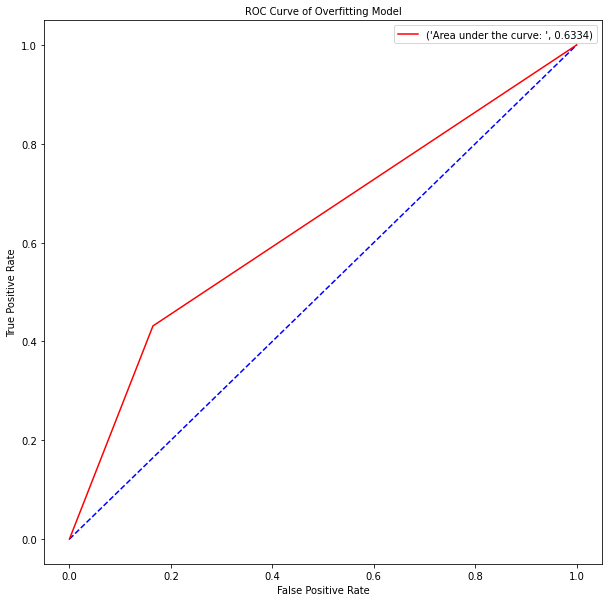

In [ ]:
## Overfitting Model
model_performances(YVALID, ypredF, 'ROC Curve of Overfitting Model')

##Beginning of phase 4 for bonus points <br>
#**FEATURE IMPORTANCE & REDUCTION** <br>
##Feature selection is the process of reducing the number of input variables when developing a predictive model.<br>

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model<br>
**Phase 4**

In [ ]:
import datetime
import pytz
import operator

In [ ]:
importance_feature_columns = []
importance_feature = []
for index in range(dataset.shape[1] - 1):
    ## Aquire the column
    x = dataset[dataset.columns[index]].values
    y = dataset['Potability'].values

    ## Index for 30%
    i_30 = int(0.3 * len(dataset_np[:, 0]))

    ## Split data into training and validation sets
    xvalid = x[:i_30]
    yvalid = y[:i_30]
    
    xtrain = x[i_30:]
    ytrain = y[i_30:]

    ## Make use of Mean normalization
    min = xtrain.min(axis = 0) 
    max = xtrain.max(axis = 0) 
    mean = xtrain.mean(axis = 0)
    xtrain = (xtrain - mean) / (max - min)
    xvalid = (xvalid - mean) / (max - min)

    ## Rescaling
    ymax = ytrain.max()
    ytrain = ytrain / ymax
    yvalid = yvalid / ymax

    ## Callback
    callback_a = ModelCheckpoint(filepath = "significance_removal.hdf5", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)

    ## Model
    model = Sequential()
    model.add(Dense(8, input_dim=1, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    ## Compile Model
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    history = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs=1024, batch_size=100, callbacks=[callback_a, callback_b], verbose=0)
    
    ## Prediction
    prediction = model.predict(xvalid, verbose=0)
    prediction = (prediction > 0.5)
    acc_score = accuracy_score(yvalid, prediction)

    ## Storing Accuracy
    importance_feature_columns.append(dataset.columns[index])
    importance_feature.append(acc_score)
    print("%s | %s | %s" % (datetime.datetime.now(pytz.timezone('US/Central')).strftime("%Y/%m/%d %I:%M:%S %p"), dataset.columns[index], acc_score))
# 
print()
print(importance_feature_columns)
print(importance_feature)

2022/04/25 07:09:51 PM | ph | 0.6185737976782753
2022/04/25 07:10:00 PM | Hardness | 0.615257048092869
2022/04/25 07:10:05 PM | Solids | 0.6185737976782753
2022/04/25 07:10:16 PM | Chloramines | 0.6053067993366501
2022/04/25 07:10:27 PM | Sulfate | 0.6119402985074627
2022/04/25 07:10:38 PM | Conductivity | 0.6185737976782753
2022/04/25 07:10:44 PM | Organic_carbon | 0.6185737976782753
2022/04/25 07:10:52 PM | Trihalomethanes | 0.6185737976782753
2022/04/25 07:10:58 PM | Turbidity | 0.6185737976782753

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
[0.6185737976782753, 0.615257048092869, 0.6185737976782753, 0.6053067993366501, 0.6119402985074627, 0.6185737976782753, 0.6185737976782753, 0.6185737976782753, 0.6185737976782753]


#**Plotting the importance of each feature**

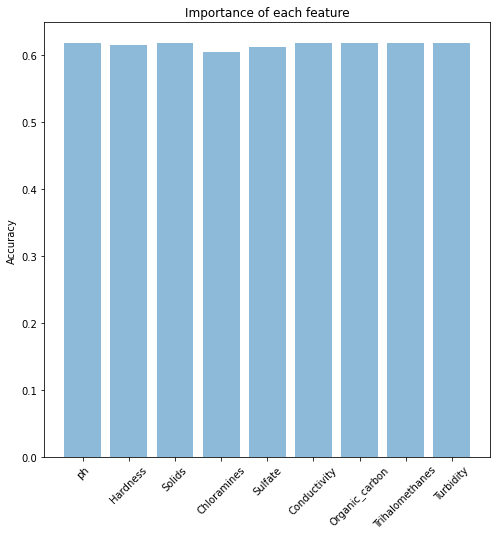

In [ ]:
y_pos = np.arange(len(importance_feature_columns))

plt.figure(figsize=(8, 8))
plt.bar(y_pos, importance_feature, align='center', alpha=0.5)
plt.xticks(y_pos, importance_feature_columns, fontsize=10, rotation=45)
plt.ylabel('Accuracy')
plt.title('Importance of each feature')

plt.show()

#**Ranking each feature by importance**

In [ ]:
# Rank features by importance
dictionary_significance = {}
for index, name in enumerate(importance_feature_columns):
    dictionary_significance[name] = importance_feature[index]

dictionary_significance = sorted(dictionary_significance.items(), key=operator.itemgetter(1))
print(dictionary_significance)

[('Chloramines', 0.6053067993366501), ('Sulfate', 0.6119402985074627), ('Hardness', 0.615257048092869), ('ph', 0.6185737976782753), ('Solids', 0.6185737976782753), ('Conductivity', 0.6185737976782753), ('Organic_carbon', 0.6185737976782753), ('Trihalomethanes', 0.6185737976782753), ('Turbidity', 0.6185737976782753)]


#**Drop in performance after feature reduction**

In [ ]:
performance_feature_columns = []
performance_feature = []

for index in range(dataset.shape[1] - 1):
    # Aquire the column
    x = dataset.drop([dataset.columns[index], 'Potability'], axis='columns').values
    y = dataset['Potability'].values

    ## Index for 30%
    i_30 = int(0.3 * len(dataset_np[:, 0]))

    ## Split data into training and validation sets
    xvalid = x[:i_30]
    yvalid = y[:i_30]
    
    xtrain = x[i_30:]
    ytrain = y[i_30:]

    ## Make use of Mean normalization
    min = xtrain.min(axis = 0) 
    max = xtrain.max(axis = 0) 
    mean = xtrain.mean(axis = 0)
    xtrain = (xtrain - mean) / (max - min)
    xvalid = (xvalid - mean) / (max - min)

    ## Rescaling
    ymax = ytrain.max()
    ytrain = ytrain / ymax
    yvalid = yvalid / ymax

    # Callback
    callback_a = ModelCheckpoint(filepath = "feature_removal.hdf5", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)

    # Model
    model = Sequential()
    model.add(Dense(8, input_dim=len(xtrain[0, :]), activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    history = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs=1024, batch_size=100, callbacks=[callback_a, callback_b], verbose=0)
    
    ## Prediction
    prediction = model.predict(xvalid, verbose=0)
    prediction = (prediction > 0.5)
    acc_score = accuracy_score(yvalid, prediction)

    ## Storing Accuracy
    performance_feature_columns.append(dataset.columns[index])
    performance_feature.append(acc_score)
    print("%s | %s | %s" % (datetime.datetime.now(pytz.timezone('US/Central')).strftime("%Y/%m/%d %I:%M:%S %p"), dataset.columns[index], acc_score))

print()
print(performance_feature_columns)
print(performance_feature)

2022/04/25 07:26:59 PM | ph | 0.6318407960199005
2022/04/25 07:27:21 PM | Hardness | 0.6782752902155887
2022/04/25 07:27:35 PM | Solids | 0.6733001658374793
2022/04/25 07:28:17 PM | Chloramines | 0.681592039800995
2022/04/25 07:28:38 PM | Sulfate | 0.5986733001658375
2022/04/25 07:28:53 PM | Conductivity | 0.6832504145936982
2022/04/25 07:29:08 PM | Organic_carbon | 0.693200663349917
2022/04/25 07:29:22 PM | Trihalomethanes | 0.6733001658374793
2022/04/25 07:29:43 PM | Turbidity | 0.6832504145936982

['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
[0.6318407960199005, 0.6782752902155887, 0.6733001658374793, 0.681592039800995, 0.5986733001658375, 0.6832504145936982, 0.693200663349917, 0.6733001658374793, 0.6832504145936982]


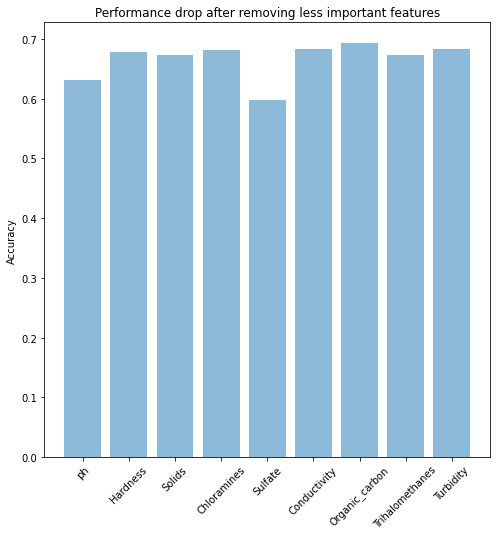

In [ ]:
y_pos = np.arange(len(performance_feature_columns))

plt.figure(figsize=(8, 8))
plt.bar(y_pos, performance_feature, align='center', alpha=0.5)
plt.xticks(y_pos, performance_feature_columns, fontsize=10, rotation=45)
plt.ylabel('Accuracy')
plt.title('Performance drop after removing less important features')

plt.show()

In [ ]:
# Ranking the features by their performance
dictionary_performance = {}
for index, name in enumerate(performance_feature_columns):
    dictionary_performance[name] = performance_feature[index]

dictionary_performance = sorted(dictionary_performance.items(), key=operator.itemgetter(1))
print(dictionary_performance)

[('Sulfate', 0.5986733001658375), ('ph', 0.6318407960199005), ('Solids', 0.6733001658374793), ('Trihalomethanes', 0.6733001658374793), ('Hardness', 0.6782752902155887), ('Chloramines', 0.681592039800995), ('Conductivity', 0.6832504145936982), ('Turbidity', 0.6832504145936982), ('Organic_carbon', 0.693200663349917)]


#**Removing two features**

In [ ]:
two_feature_columns = []
two_feature = []

combo = combinations(list(range(dataset.shape[1] - 1)), 2)
for c in list(combo):
    # Aquire the column
    x = dataset.drop([dataset.columns[c[0]], dataset.columns[c[1]], 'Potability'], axis='columns').values
    y = dataset['Potability'].values

    ## Index for 30%
    i_30 = int(0.3 * len(dataset_np[:, 0]))

    ## Split data into training and validation sets
    xvalid = x[:i_30]
    yvalid = y[:i_30]
    
    xtrain = x[i_30:]
    ytrain = y[i_30:]

    ## Make use of  Mean normalization
    min = xtrain.min(axis = 0) 
    max = xtrain.max(axis = 0) 
    mean = xtrain.mean(axis = 0)
    xtrain = (xtrain - mean) / (max - min)
    xvalid = (xvalid - mean) / (max - min)

    ## Rescaling
    ymax = ytrain.max()
    ytrain = ytrain / ymax
    yvalid = yvalid / ymax

    # Callback
    callback_a = ModelCheckpoint(filepath = "feature_removal.hdf5", monitor='val_loss', save_best_only=True, save_weights_only=True, verbose=0)
    callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=0)

    # Model
    model = Sequential()
    model.add(Dense(8, input_dim=len(xtrain[0, :]), activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    history = model.fit(xtrain, ytrain, validation_data=(xvalid, yvalid), epochs=1024, batch_size=100, callbacks=[callback_a, callback_b], verbose=0)
    
    ## Prediction
    prediction = model.predict(xvalid, verbose=0)
    prediction = (prediction > 0.5)
    acc_score = accuracy_score(yvalid, prediction)

    ## Storing Accuracy
    pair_name = "%s:%s" % (dataset.columns[c[0]], dataset.columns[c[1]])
    two_feature_columns.append(pair_name)
    two_feature.append(acc_score)
    print("%s | %s | %s" % (datetime.datetime.now(pytz.timezone('US/Central')).strftime("%Y/%m/%d %I:%M:%S %p"), pair_name, acc_score))

print()
print(two_feature_columns)
print(two_feature)

2022/04/25 07:36:30 PM | ph:Hardness | 0.615257048092869
2022/04/25 07:36:38 PM | ph:Solids | 0.6086235489220564
2022/04/25 07:36:59 PM | ph:Chloramines | 0.6268656716417911
2022/04/25 07:37:10 PM | ph:Sulfate | 0.6086235489220564
2022/04/25 07:37:16 PM | ph:Conductivity | 0.6119402985074627
2022/04/25 07:37:28 PM | ph:Organic_carbon | 0.6384742951907131
2022/04/25 07:37:49 PM | ph:Trihalomethanes | 0.6285240464344942
2022/04/25 07:37:57 PM | ph:Turbidity | 0.6202321724709784
2022/04/25 07:38:11 PM | Hardness:Solids | 0.6434494195688225
2022/04/25 07:38:32 PM | Hardness:Chloramines | 0.6334991708126037
2022/04/25 07:38:37 PM | Hardness:Sulfate | 0.6169154228855721
2022/04/25 07:38:58 PM | Hardness:Conductivity | 0.6716417910447762
2022/04/25 07:39:40 PM | Hardness:Organic_carbon | 0.6666666666666666
2022/04/25 07:40:01 PM | Hardness:Trihalomethanes | 0.6567164179104478
2022/04/25 07:40:22 PM | Hardness:Turbidity | 0.6567164179104478
2022/04/25 07:40:43 PM | Solids:Chloramines | 0.65339

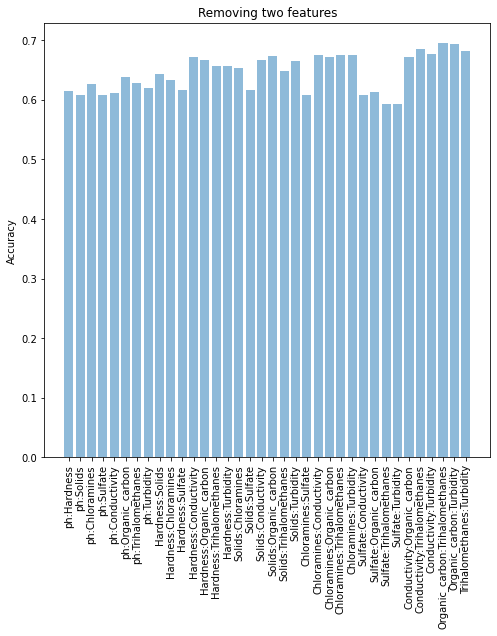

In [ ]:
y_pos = np.arange(len(two_feature_columns))

plt.figure(figsize=(8, 8))
plt.bar(y_pos, two_feature, align='center', alpha=0.5)
plt.xticks(y_pos, two_feature_columns, fontsize=10, rotation=90)
plt.ylabel('Accuracy')
plt.title('Removing two features')

plt.show()

#**XGBoost**(Extreme Gradient Boosting)<br>
is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [ ]:
xg_cla = xgb.XGBClassifier(n_estimators=30, max_depth=3)

In [ ]:
xg_cla.fit(XTRAIN, YTRAIN, eval_set=[(XVALID, YVALID)], verbose=1)

[0]	validation_0-error:0.380597
[1]	validation_0-error:0.373134
[2]	validation_0-error:0.393035
[3]	validation_0-error:0.373134
[4]	validation_0-error:0.380597
[5]	validation_0-error:0.378109
[6]	validation_0-error:0.38806
[7]	validation_0-error:0.365672
[8]	validation_0-error:0.363184
[9]	validation_0-error:0.363184
[10]	validation_0-error:0.370647
[11]	validation_0-error:0.365672
[12]	validation_0-error:0.368159
[13]	validation_0-error:0.370647
[14]	validation_0-error:0.368159
[15]	validation_0-error:0.360697
[16]	validation_0-error:0.360697
[17]	validation_0-error:0.363184
[18]	validation_0-error:0.360697
[19]	validation_0-error:0.358209
[20]	validation_0-error:0.363184
[21]	validation_0-error:0.363184
[22]	validation_0-error:0.363184
[23]	validation_0-error:0.363184
[24]	validation_0-error:0.363184
[25]	validation_0-error:0.358209
[26]	validation_0-error:0.350746
[27]	validation_0-error:0.353234
[28]	validation_0-error:0.353234
[29]	validation_0-error:0.353234


XGBClassifier(n_estimators=30)

In [ ]:
def xgb_evaluation_classification(model, xtrain, ytrain, xvalid, yvalid):
    preds_train = model.predict(xtrain)
    print(ytrain[:10])
    print(preds_train[:10])
    print()
    preds_valid = model.predict(xvalid)
    print(yvalid[:10])
    print(preds_valid[:10])
    print()
    prediction = model.predict(xvalid)
    accuracy = accuracy_score(yvalid, prediction.round()) * 100.0
    precision = precision_score(yvalid, prediction.round(), average='micro') * 100.0
    recall = recall_score(yvalid, prediction.round(), average='micro') * 100.0
    f1score = f1_score(yvalid, prediction.round(), average='micro')

    print("Accuracy: %.2f%%" % (accuracy))
    print("Precision: %.2f%%" % (precision))
    print("Recall: %.2f%%" % (recall))
    print("F1-score: %.2f\n" % (f1score))
    return prediction

In [ ]:
predXGB = xgb_evaluation_classification(xg_cla, XTRAIN, YTRAIN, XVALID, YVALID)

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]
[0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]

[0. 0. 1. 0. 0. 1. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Accuracy: 64.68%
Precision: 64.68%
Recall: 64.68%
F1-score: 0.65



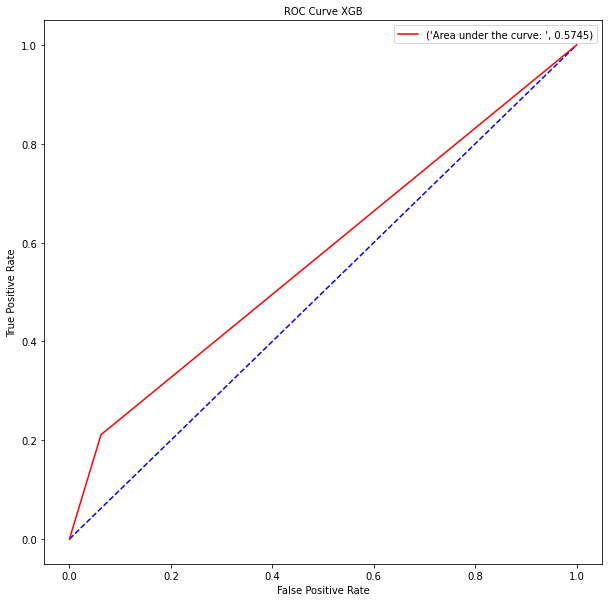

In [ ]:
model_performances(YVALID, predXGB, 'ROC Curve XGB')

In [ ]:
pip uninstall Jinja2==2.6

In [ ]:
pip install nbconvert==6.4.3

In [ ]:
%%shell
jupyter nbconvert --to html /content/A_I_courseProjectZakFulliam.ipynb